In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('expert_outreach_metrics_dec.csv')




In [19]:

print(df.head())  # print first 5 rows
print(df.info())  # column names, non-null counts, data types
# print(df.shape)  # rows x columns


   project_id  segment_id      epl_id  expert_id  employee_id  \
0      167254      393510  11077798.0   544249.0      3000465   
1      164186      385397  10824621.0  3912159.0      2268551   
2      164643      386625  10870676.0  3682338.0      3383341   
3      165792      389715  10967280.0   438368.0      3391843   
4      167006      392799  11055002.0  3288207.0      2175566   

                            outreach_id         source expert_status  \
0  0000f31b-09e2-4bc5-a17b-af1c68ec2d98  ProjectInvite        active   
1  0000fb3a-27eb-43bf-957c-c79df2f0dc8c  ProjectInvite   neverActive   
2  000164ba-ce4a-49c3-b68d-b36bef95a8b6  ProjectInvite        active   
3  0001b016-9259-4f92-94cd-53a36329191b  ProjectInvite      inactive   
4  00023afe-efa7-45da-b0e1-c6f15fa24113  ProjectInvite        active   

  unsubscribe_event               created_at         metric_logged_at  
0               NaN  2025-01-16 14:08:53.000  2025-01-16 14:08:53.000  
1               NaN  2025-01-16 

In [5]:
print(df['source'].value_counts())

source
AthenaList       593481
ProjectInvite    455094
Name: count, dtype: int64


In [6]:

print(df.isnull().sum())  # total null values per column

print(f"percentage of AthenaList with null expert_id {round(160715 / 593481 * 100, 2)}%")


project_id                 0
segment_id                 0
epl_id                593481
expert_id             160715
employee_id                0
outreach_id                0
source                     0
expert_status              0
unsubscribe_event    1047415
created_at                 0
metric_logged_at           0
dtype: int64
percentage of AthenaList with null expert_id 27.08%


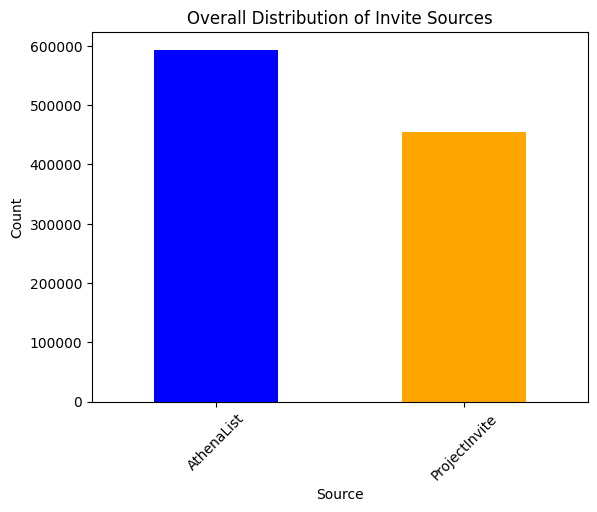

In [7]:
# source_distribution = df.groupby(['project_id', 'source']).size().reset_index(name='count')

# print(source_distribution)

overall_distribution = df['source'].value_counts()

filtered_overall_distribution = overall_distribution.loc[['AthenaList', 'ProjectInvite']]

# print(filtered_overall_distribution)

filtered_overall_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Overall Distribution of Invite Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


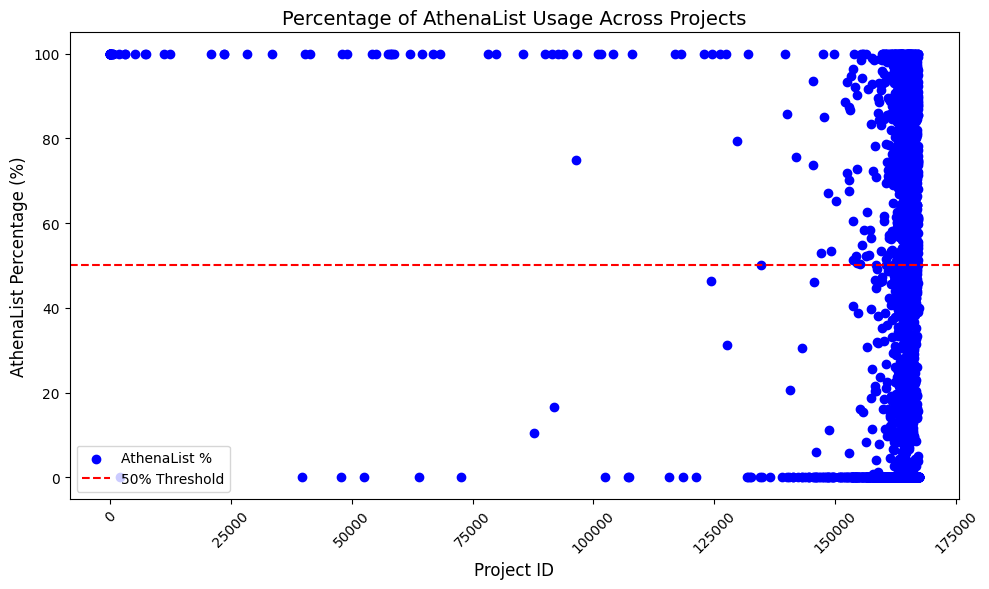

In [10]:
# Calculate total invites per project
project_totals = df.groupby('project_id')['source'].count().reset_index(name='total_count')

# Calculate AthenaList invites per project
athena_count = df[df['source'] == 'AthenaList'].groupby('project_id')['source'].count().reset_index(name='athena_count')

# Merge the totals and AthenaList counts
percentage_data = pd.merge(project_totals, athena_count, on='project_id', how='left')

# Calculate percentage of AthenaList
percentage_data['athena_percentage'] = (percentage_data['athena_count'] / percentage_data['total_count']) * 100

# Replace NaN with 0 for projects with no AthenaList invites
percentage_data['athena_percentage'] = percentage_data['athena_percentage'].fillna(0)


plt.figure(figsize=(10, 6))
plt.scatter(
    percentage_data['project_id'], 
    percentage_data['athena_percentage'], 
    color='blue', 
    label='AthenaList %'
)

# Add labels and title
plt.title('Percentage of AthenaList Usage Across Projects', fontsize=14)
plt.xlabel('Project ID', fontsize=12)
plt.ylabel('AthenaList Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=50, color='red', linestyle='--', label='50% Threshold')  # Optional threshold line
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

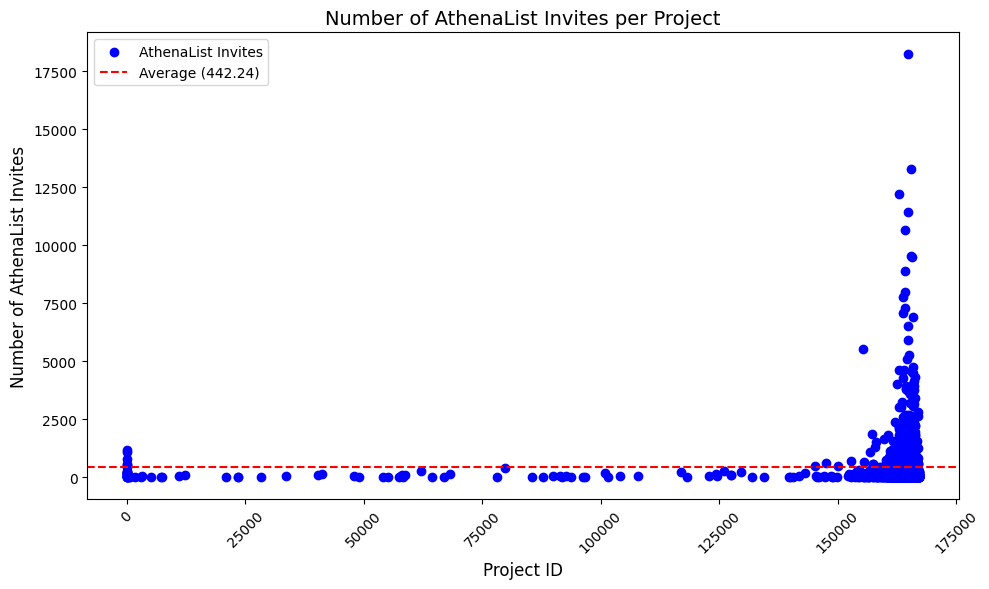

In [11]:
athena_count_per_project = df[df['source'] == 'AthenaList'].groupby('project_id').size().reset_index(name='athena_count')

plt.figure(figsize=(10, 6))
plt.scatter(
    athena_count_per_project['project_id'], 
    athena_count_per_project['athena_count'], 
    color='blue', 
    label='AthenaList Invites'
)

# Add labels and title
plt.title('Number of AthenaList Invites per Project', fontsize=14)
plt.xlabel('Project ID', fontsize=12)
plt.ylabel('Number of AthenaList Invites', fontsize=12)
plt.xticks(rotation=45)

# Optional: You can add a horizontal line to indicate average number of invites
avg_invites = athena_count_per_project['athena_count'].mean()
plt.axhline(y=avg_invites, color='red', linestyle='--', label=f'Average ({avg_invites:.2f})')

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

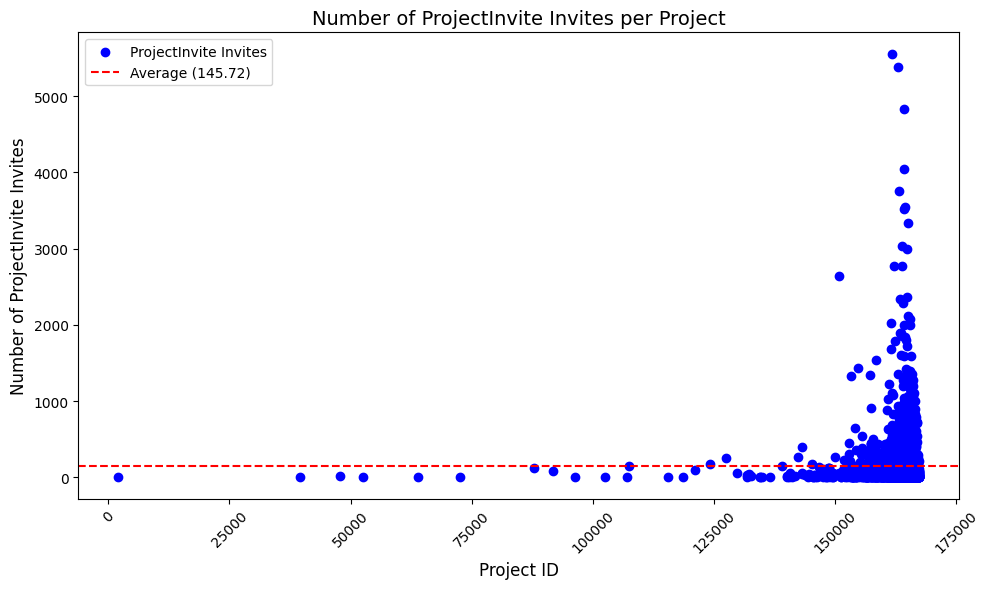

In [14]:
athena_count_per_project = df[df['source'] == 'ProjectInvite'].groupby('project_id').size().reset_index(name='athena_count')

plt.figure(figsize=(10, 6))
plt.scatter(
    athena_count_per_project['project_id'], 
    athena_count_per_project['athena_count'], 
    color='blue', 
    label='ProjectInvite Invites'
)

# Add labels and title
plt.title('Number of ProjectInvite Invites per Project', fontsize=14)
plt.xlabel('Project ID', fontsize=12)
plt.ylabel('Number of ProjectInvite Invites', fontsize=12)
plt.xticks(rotation=45)

# Optional: You can add a horizontal line to indicate average number of invites
avg_invites = athena_count_per_project['athena_count'].mean()
plt.axhline(y=avg_invites, color='red', linestyle='--', label=f'Average ({avg_invites:.2f})')

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

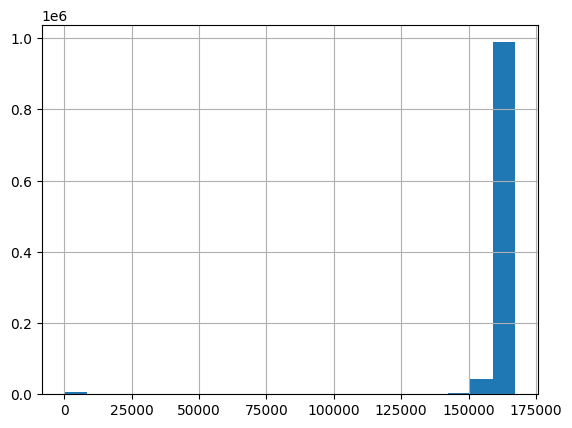

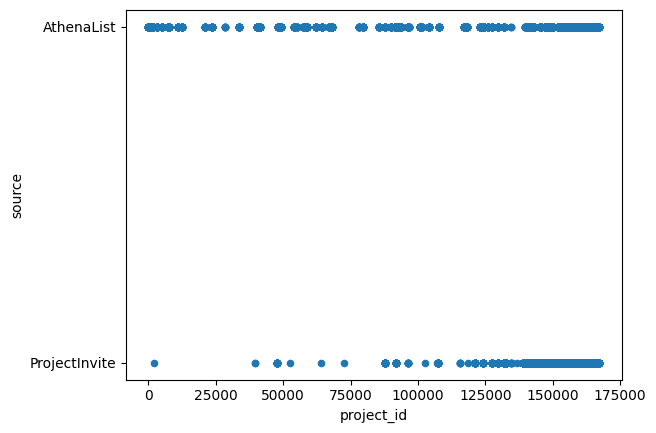

In [18]:
df["project_id"].hist(bins=20)
plt.show()

df.plot.scatter(x="project_id", y="source")
plt.show()
